In [1]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm as svm
import matplotlib.pyplot as plot 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb

In [2]:
nums = [0,1,2,3,4]
matchnums = [0,1,2,4,5,6]
promatchnums = [4,5,6,7,8,9,10,14,15,16,17]
amateurmatchnums = [0,1,2,3,11,12,13,18,19,20,21]
rdf = pd.DataFrame(columns=['time','level','rank'])
rankdf = pd.read_csv("C:\\Users\\tisla\\rank.csv");
csvs = ["emg","facial_skin_temperature","spo2","gsr"]
df = pd.DataFrame(columns=['time', 'heart_rate', 'emg_right_hand', 'emg_left_hand','facial_skin_temperature','spo2','gsr'])
for z in matchnums: 
    for x in nums:
        mergedf = pd.read_csv("C:\\Users\\tisla\\esports\\matches\\match_" + str(z) + "\\player_" + str(x) +"\\heart_rate.csv")
        for y in csvs:
            currdf = pd.read_csv("C:\\Users\\tisla\\esports\\matches\\match_" + str(z) + "\\player_" + str(x) + "\\" + y + ".csv")
            mergedf = pd.merge(mergedf,currdf,on="time")
        if(z in promatchnums):
            rdf['time'] = rankdf['time']
            rdf['level'] = rankdf['p']
            rdf['rank'] = rankdf['p'+str(x)]
            mergedf = pd.merge(mergedf,rdf,on="time")
        else:
            rdf['time'] = rankdf['time']
            rdf['level'] = rankdf['a']
            rdf['rank'] = rankdf['a'+str(x)]
            mergedf = pd.merge(mergedf,rdf,on="time")
        df = pd.concat([df,mergedf],ignore_index=True)
        
df.head(10)      



,time,heart_rate,emg_right_hand,emg_left_hand,facial_skin_temperature,spo2,gsr,level,rank
0,5,96.935484,8.848604,5.592949,33.790742,99.373746,14840.605474,amateur,gold
1,6,95.354839,9.802950,5.709992,33.764458,98.966226,14752.163145,amateur,gold
2,7,93.548387,10.463710,5.754839,33.732032,98.500489,14800.002271,amateur,gold
3,8,92.161290,7.547870,5.895823,33.696535,97.988178,14949.071888,amateur,gold
4,9,91.483871,6.188048,6.504363,33.659503,97.441312,15190.490644,amateur,gold
5,10,91.161290,5.464992,6.890488,33.621703,96.830032,15363.824049,amateur,gold
6,11,91.032258,5.624028,15.207341,33.606381,96.218752,15524.187939,amateur,gold
7,12,91.516129,5.235401,16.464557,33.602297,96.230061,15667.168513,amateur,gold
8,13,91.258065,6.332258,14.728226,33.603832,96.552663,15754.641829,amateur,gold
9,14,90.096774,8.595161,11.237097,33.608177,97.030913,15814.448995,amateur,gold


In [3]:
dff = df.iloc[:,0:7].values
dfl = df.iloc[:,8].values

In [4]:
dfftrain,dfftest,dfltrain,dfltest = train_test_split(dff,dfl,train_size=.75,random_state=0)

In [5]:
standardscaler = StandardScaler()
dfftrain = standardscaler.fit_transform(dfftrain)

In [6]:
dfftest = standardscaler.transform(dfftest)

In [7]:
lda = LDA(n_components=3)
dfftrain = lda.fit_transform(dfftrain, dfltrain)
dfftest = lda.transform(dfftest)

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(dfftrain,dfltrain)

KNeighborsClassifier(n_neighbors=3)

In [9]:
predictions = knn.predict(dfftest)

In [10]:
print(accuracy_score(dfltest,predictions))

0.9891441157960982


In [11]:
lda.explained_variance_ratio_

array([0.61751182, 0.32653212, 0.0543293 ])

Text(0, 0.5, 'Explained Variance')

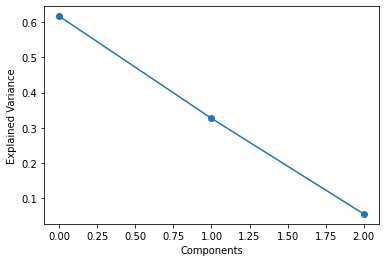

In [12]:
fig = plot.figure()
ax = fig.gca();
ax.plot(lda.explained_variance_ratio_,marker="o")
plot.xlabel("Components")
plot.ylabel("Explained Variance")

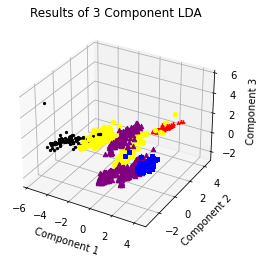

In [13]:
fig = plot.figure()
ax = fig.add_subplot(projection="3d")
markers = {'gold':'o', 'no_rank': '.', 'diamond':'^', 'platinum':'2','master':'s'}
colors = {'gold':'yellow', 'no_rank': 'black', 'diamond':'purple', 'platinum':'red','master':'blue'}
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plot.title('Results of 3 Component LDA')
for x in range(0,1000):
    ax.scatter(dfftrain[x,0],dfftrain[x,1],dfftrain[x,2],marker=markers[dfltrain[x]],color=colors[dfltrain[x]])

In [7]:
svm = svm.SVC(C=1,kernel='linear')
svm.fit(dfftrain,dfltrain)
svmpredictions = svm.predict(dfftest)

In [8]:
print(accuracy_score(dfltest,svmpredictions))

0.8791692888609188


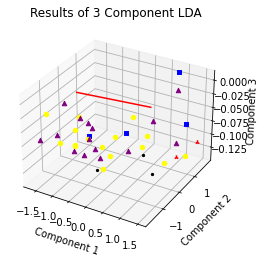

In [11]:
fig = plot.figure()
ax = fig.add_subplot(projection="3d")
markers = {'gold':'o', 'no_rank': '.', 'diamond':'^', 'platinum':'2','master':'s'}
colors = {'gold':'yellow', 'no_rank': 'black', 'diamond':'purple', 'platinum':'red','master':'blue'}
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plot.title('Results of 3 Component LDA')
for x in range(0,40):
    ax.scatter(dfftrain[x,0],dfftrain[x,1],dfftrain[x,2],marker=markers[dfltrain[x]],color=colors[dfltrain[x]])
w = svm.coef_[0]
b = svm.intercept_[0] 
x_points = np.linspace(-1, 1)  
y_points = -(w[0] / w[1]) * x_points - b / w[1] 
plt.plot(x_points, y_points, c='r');


In [10]:
gnb = GaussianNB()
gnb.fit(dfftrain,dfltrain)

GaussianNB()

In [11]:
gnbpredictions = gnb.predict(dfftest)

In [12]:
print(accuracy_score(dfltest,gnbpredictions))

0.8580868470736313


In [13]:
gnb.var_

array([[9.41990240e-01, 9.07709225e-01, 2.49404497e+00, 3.53065422e-01,
        7.59503127e-01, 4.77612821e-01, 3.04128929e-01],
       [1.07456723e+00, 6.88202849e-01, 8.40486171e-03, 1.30774719e-01,
        4.13444569e-01, 1.27593725e+00, 7.54213414e-01],
       [9.18205546e-01, 1.55989158e-01, 1.41249492e-02, 1.69906532e+00,
        3.57554373e-02, 3.93396908e+00, 1.19425675e-03],
       [1.03984900e+00, 3.36465560e-01, 5.61972663e-03, 5.73837296e+00,
        1.58850515e-02, 6.00651168e-02, 1.49778454e-01],
       [1.02592731e+00, 2.03996939e-01, 2.93921839e-03, 1.23160152e-01,
        9.77137467e-04, 2.35541593e-02, 8.03176948e-03]])

In [16]:
gnb.class_prior_

array([0.39586721, 0.3093827 , 0.09859967, 0.0997535 , 0.09639692])

In [17]:
gnb.classes_

array(['diamond', 'gold', 'master', 'no_rank', 'platinum'], dtype='<U8')

Text(0.5, 1.0, 'HeatMap Representing Correlation Matrix')

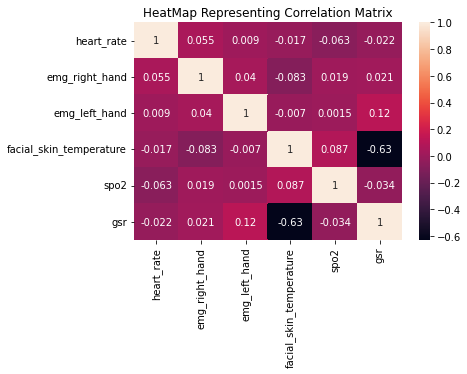

In [29]:
corrmat = df.corr()
sb.heatmap(corrmat,annot=True)
plot.title("HeatMap Representing Correlation Matrix")

c:\users\tisla\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(


array([<AxesSubplot:title={'center':'heart_rate'}, xlabel='rank'>,
       <AxesSubplot:title={'center':'spo2'}, xlabel='rank'>], dtype=object)

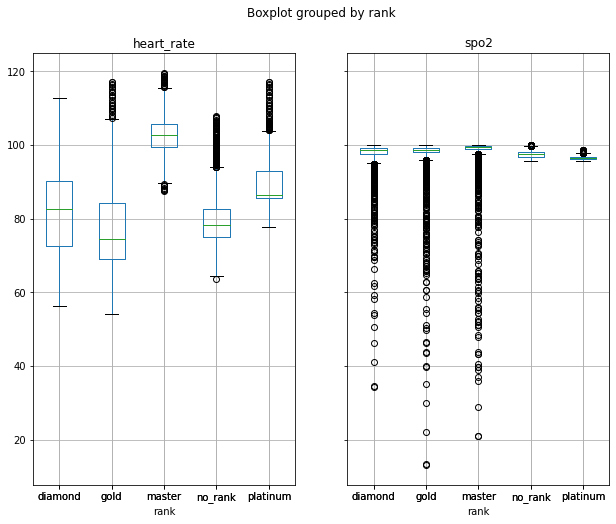

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['heart_rate','spo2'],by="rank",ax=ax)

c:\users\tisla\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:394: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  ax = boxplot(


(0.0, 20.0)

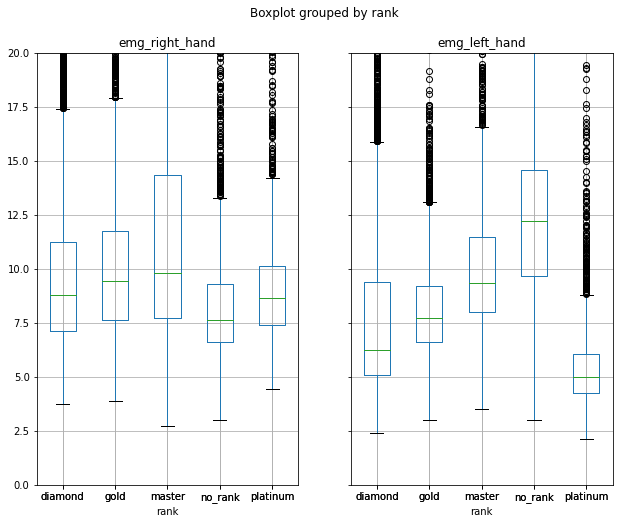

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
box = df.boxplot(column=['emg_right_hand','emg_left_hand'],by="rank",ax=ax)
plot.ylim(0,20)

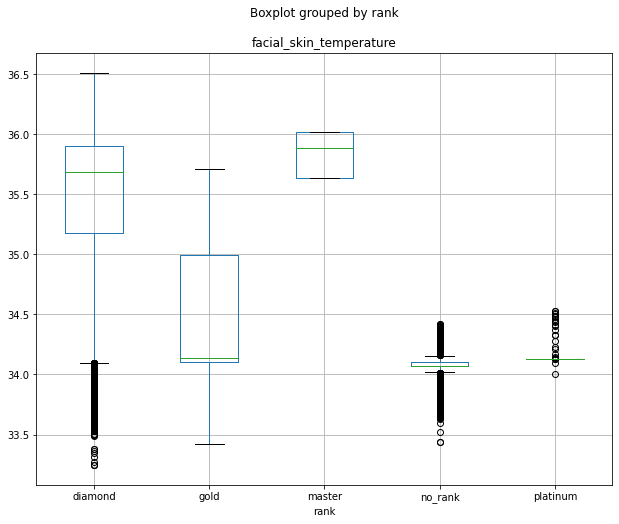

In [64]:
fig, ax = plt.subplots(figsize=(10,8))
box = df.boxplot(column=['facial_skin_temperature'],by="rank",ax=ax)